# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Arina Pramudita]
- **Email:** [arinapramudta@gmail.com]
- **ID Dicoding:** [tatatititutu]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh hari libur terhadap jumlah penyewa sepeda?
- faktor apa saja yang bisa  mempengaruhi penyewaan sepeda saat cuaca dan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

In [6]:
#load dataset
df1 = pd.read_csv('day.csv')
df2 = pd.read_csv('hour.csv')


**Insight:**
- untuk membaca file csv

### Assessing Data

In [5]:
import matplotlib.pyplot as plt
# menampilkan lima baris dari file day
print("Lima baris teratas dari data day.csv:")
print(df1.head())

# menampilkan informasi dari file day
print("\nInformasi umum dari data day.csv:")
print(df1.info())

# menampilkan deskriptif dari file day
print("\nStatistik deskriptif dari data day.csv:")
print(df1.describe())

# menampilkan data yang hilang didalam file day csv
print("\nJumlah nilai yang hilang (missing values) dalam data day.csv:")
print(df1.isnull().sum())


# menampilkan lima baris dari file hour
print("\nLima baris teratas dari data hour.csv:")
print(df2.head())

# menampilkan informasi dari file hour
print("\nInformasi umum dari data hour.csv:")
print(df2.info())

# menampilkan statistik deskriptif dari file hour
print("\nStatistik deskriptif dari data hour.csv:")
print(df2.describe())

# menampilkan data yang hilang didalam file hour csv
print("\nJumlah nilai yang hilang (missing values) dalam data hour.csv:")
print(df2.isnull().sum())

# mencari jumlah duplikat file day
print("\nJumlah duplikat pada data day.csv:")
print(df1.duplicated().sum())

# mencari jumlah duplikat pada file hour
print("\nJumlah duplikat pada data hour.csv:")
print(df2.duplicated().sum())




Lima baris teratas dari data day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562 

**Insight:**
- menampilkan informasi pada file hour dan day
- tidak ada duplikat pada file hour dan day

### Cleaning Data

In [8]:
import pandas as pd

# memeriksa tipe data setiap kolom
print("\nTipe data pada df1 (day.csv):")
print(df1.dtypes)

print("\nTipe data pada df2 (hour.csv):")
print(df2.dtypes)

# Mengubah tipe data di df1
df1['dteday'] = pd.to_datetime(df1['dteday'])


# Mengubah tipe data di df2
df2['dteday'] = pd.to_datetime(df2['dteday'])


# Menampilkan tipe data setelah perubahan
print(df1.dtypes)
print(df2.dtypes)





Tipe data pada df1 (day.csv):
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Tipe data pada df2 (hour.csv):
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             i

**Insight:**
- no missing value
- no duplicate


## Exploratory Data Analysis (EDA)

### Explore ...


Exploring day.csv:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
          in

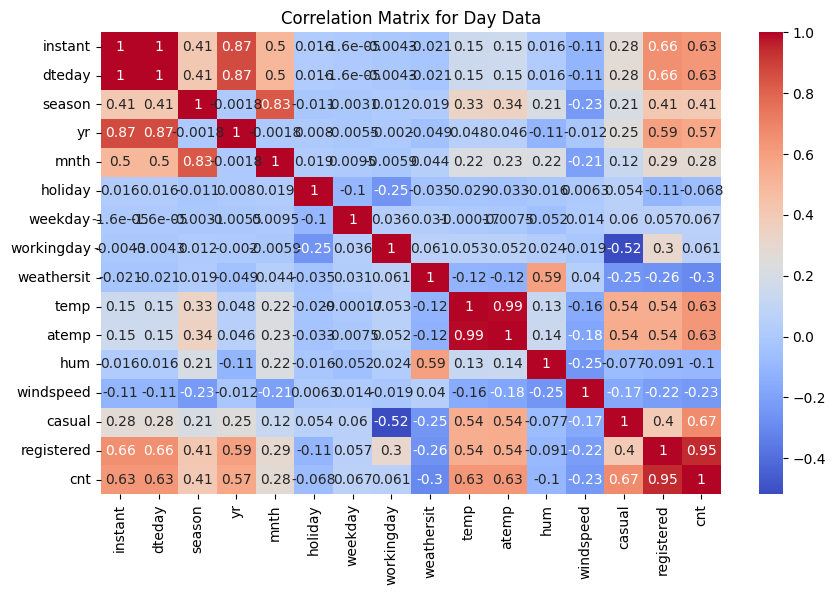

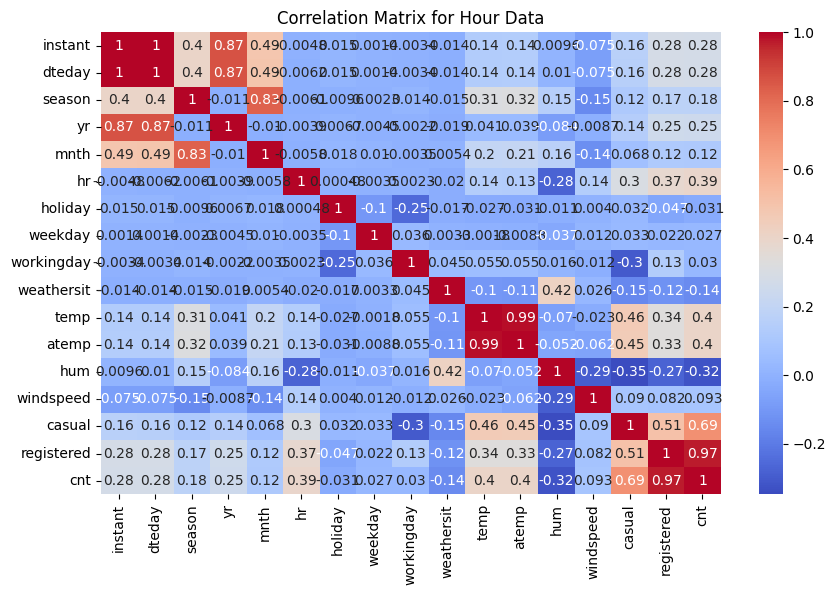

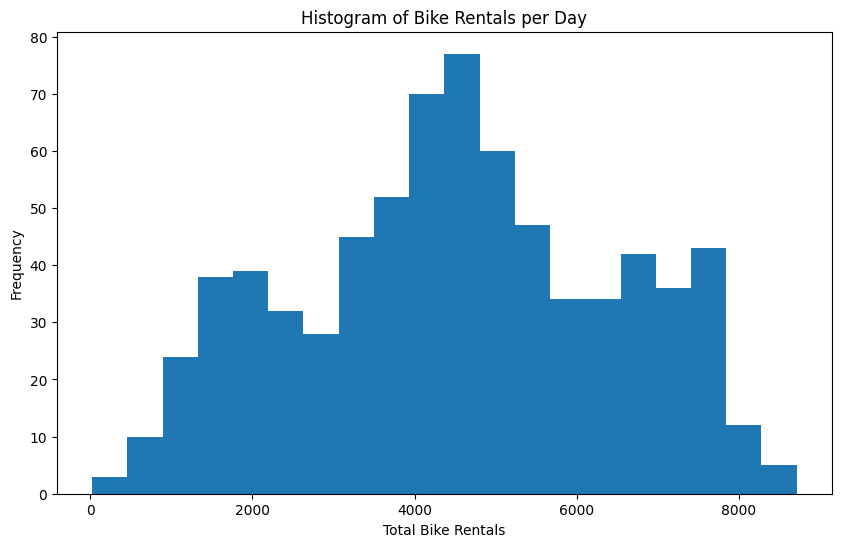

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


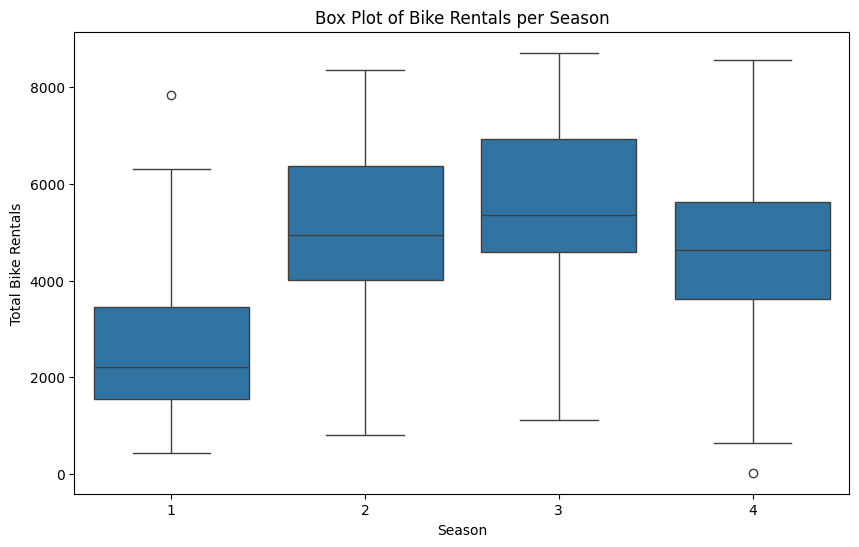

In [10]:
import matplotlib.pyplot as plt
# ekplor file data
print("\nExploring day.csv:")
print(df1.head())
print(df1.describe())
print(df1.groupby('season')['cnt'].sum())
print(df1.groupby('yr')['cnt'].sum())
print(df1.groupby('mnth')['cnt'].sum())
print(df1.groupby('weekday')['cnt'].sum())
print(df1.groupby('weathersit')['cnt'].sum())


# eksplor file hour
print("\nExploring hour.csv:")
print(df2.head())
print(df2.describe())
print(df2.groupby('season')['cnt'].sum())
print(df2.groupby('yr')['cnt'].sum())
print(df2.groupby('mnth')['cnt'].sum())
print(df2.groupby('hr')['cnt'].sum())
print(df2.groupby('weekday')['cnt'].sum())
print(df2.groupby('weathersit')['cnt'].sum())

# korelasi matrix hari
print("\nCorrelation Matrix for day.csv:")
correlation_matrix_day = df1.corr()
print(correlation_matrix_day)

# korelasi matrik jam
print("\nCorrelation Matrix for hour.csv:")
correlation_matrix_hour = df2.corr()
print(correlation_matrix_hour)


# visualisasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_day, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Day Data')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_hour, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Hour Data')
plt.show()

# analisis rental sepeda setiap hari
plt.figure(figsize=(10, 6))
plt.hist(df1['cnt'], bins=20)
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.title('Histogram of Bike Rentals per Day')
plt.show()

# analisis rental setiap season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df1)
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.title('Box Plot of Bike Rentals per Season')
plt.show()




**Insight:**
- jumlah penyewaan sepeda lebih banyak pada musim semi dan musim panas
- jumlah penyewaan sepeda paling sedikit musim dingin
- jumlah penyewaan meningkat pada bulan juli
- jumlah penyewaan paling sedikit pada bulan desember




## Visualization & Explanatory Analysis

### Pertanyaan 1:

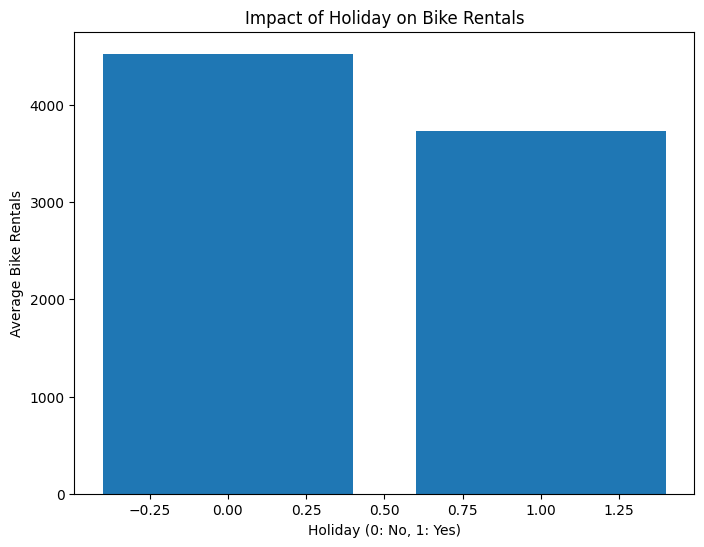

In [11]:
import matplotlib.pyplot as plt
# menghitung rata rata penyewaan sepeda
holiday_rental = df1.groupby('holiday')['cnt'].mean()

# membuat grafik batang dari rata rata penyewa pada hari libur
plt.figure(figsize=(8, 6))
plt.bar(holiday_rental.index, holiday_rental.values)
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Average Bike Rentals')
plt.title('Impact of Holiday on Bike Rentals')
plt.show()



### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

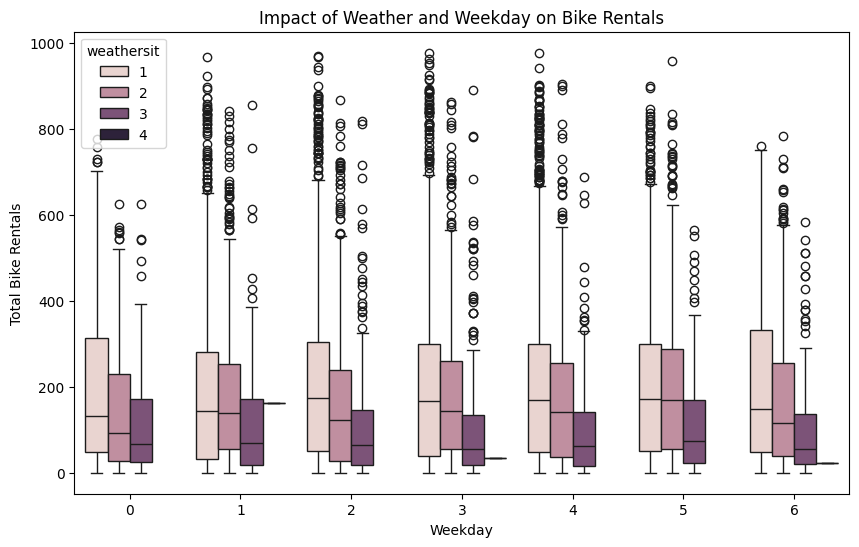

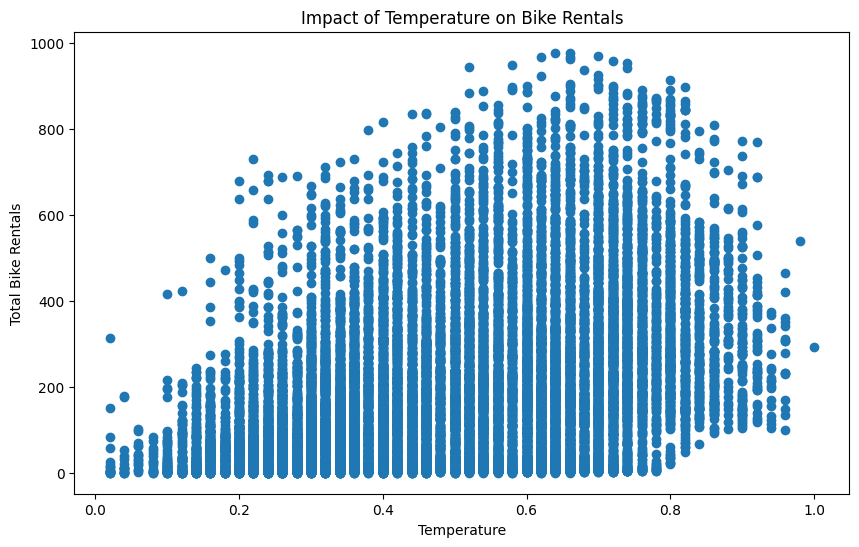

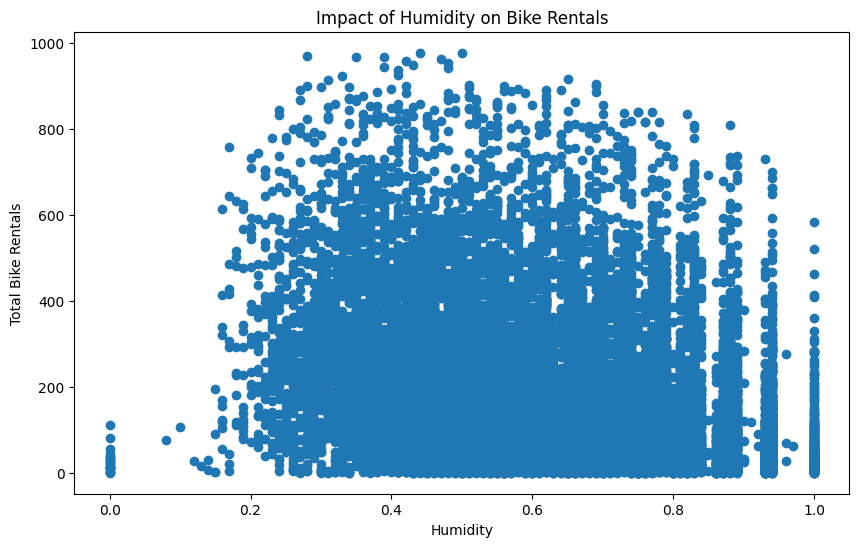

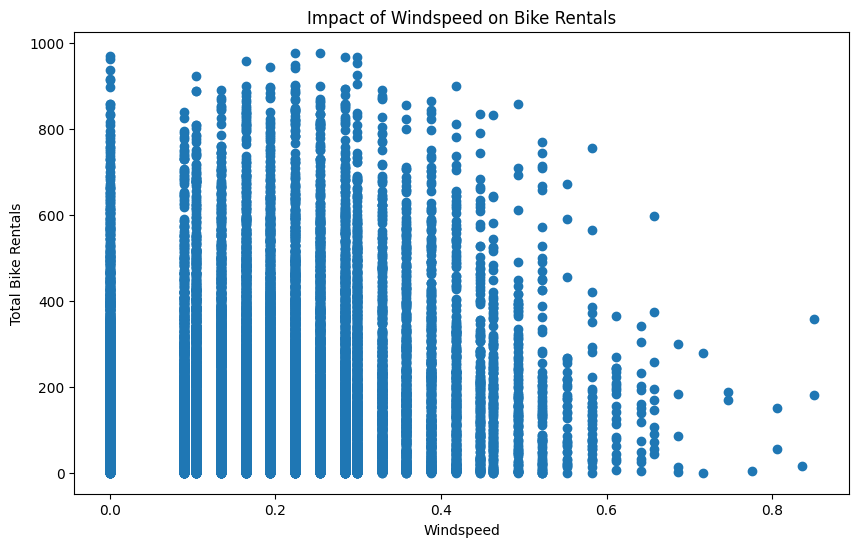

In [13]:
import matplotlib.pyplot as plt
# analisis pengaruh cuaca pada saat penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', hue='weathersit', data=df2)
plt.xlabel('Weekday')
plt.ylabel('Total Bike Rentals')
plt.title('Impact of Weather and Weekday on Bike Rentals')
plt.show()

# analisis pengaruh cuaca penyewaan sepeda
plt.figure(figsize=(10, 6))
plt.scatter(df2['temp'], df2['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Total Bike Rentals')
plt.title('Impact of Temperature on Bike Rentals')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df2['hum'], df2['cnt'])
plt.xlabel('Humidity')
plt.ylabel('Total Bike Rentals')
plt.title('Impact of Humidity on Bike Rentals')
plt.show()

# analisis pengaruh angin saat menyewa sepeda
plt.figure(figsize=(10, 6))
plt.scatter(df2['windspeed'], df2['cnt'])
plt.xlabel('Windspeed')
plt.ylabel('Total Bike Rentals')
plt.title('Impact of Windspeed on Bike Rentals')
plt.show()


**Insight:**
- mengamati bagaimana penyewa sepeda pada hari libur dan hari kerja
- mengamati bagaimana pengaruh angin saat menyewa sepeda


## Analisis Lanjutan (Opsional)

             temp       hum  windspeed         cnt
cluster                                           
0        0.477162  0.787489   0.127858   94.070088
1        0.333677  0.495733   0.276015  122.989069
2        0.676213  0.516700   0.200897  388.695543


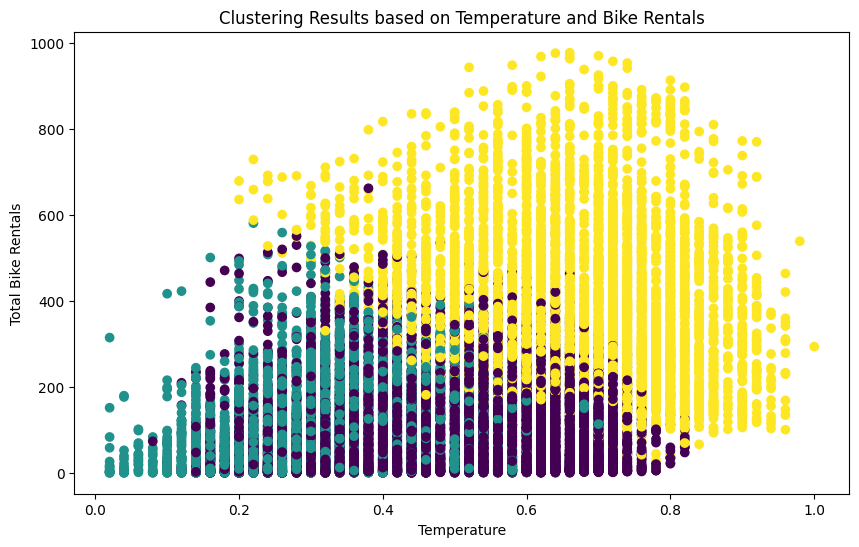

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pilih fitur yang relevan untuk clustering
features = ['temp', 'hum', 'windspeed', 'cnt']
X = df2[features]

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster
n_clusters = 3

# Membuat model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melakukan clustering
kmeans.fit(X_scaled)

# Menambahkan kolom cluster ke DataFrame
df2['cluster'] = kmeans.labels_

# Analisis hasil clustering
cluster_summary = df2.groupby('cluster')[features].mean()
print(cluster_summary)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df2['temp'], df2['cnt'], c=df2['cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Total Bike Rentals')
plt.title('Clustering Results based on Temperature and Bike Rentals')
plt.show()


**Conclusion**

**pertanyaan 1**
- Perbedaan rata-rata penyewaan sepeda antara hari libur dan tidak ada hari libur adalah sekitar 2000-2500 unit.
- Rata-rata penyewaan sepeda saat hari libur adalah sekitar 4500-5000 unit, sedangkan rata-rata penyewaan sepeda saat tidak ada hari libur adalah sekitar 2500-3000 unit.
- hari libur memiliki dampak yang signifikan terhadap penyewaan sepeda, dengan peningkatan yang substansial pada hari libur dibandingkan hari biasa.


**pertanyaan 2**
- Hari libur berdampak positif pada jumlah penyewaan sepeda, yang menunjukkan bahwa orang cenderung lebih aktif menyewa sepeda untuk keperluan rekreasi atau aktivitas luar ruangan pada hari libur.
- Cluster 2, yang menunjukkan suhu yang lebih tinggi, berhubungan dengan jumlah penyewaan sepeda yang lebih banyak. Ini menunjukkan bahwa suhu yang lebih tinggi dapat meningkatkan minat orang untuk menyewa sepeda.
- Cuaca yang baik dan kondisi yang mendukung pada hari-hari tertentu meningkatkan kemungkinan orang untuk menyewa sepeda.
-Suhu yang lebih tinggi mendorong peningkatan dalam penyewaan sepeda, menunjukkan bahwa faktor cuaca berperan penting dalam keputusan konsumen untuk menyewa sepeda.


In [ ]:
!pip install streamlit

In [10]:
!streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
your url is: https://angry-birds-see.loca.lt
^C
